
## Crime Data

I'll be looking at and analyzing data from chicago's crime statistics from 2001 to present year (2023).

First thing I would like to do is get a count of each crime. Luckily, my source at [Data.gov](https://data.gov/) included the IUCR code with each entry. Filtering by that:

In [10]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///sqlite3.db')

query = '''
select IUCR, count(IUCR) as Count
from crime_data
group by IUCR
order by Count desc'''
df = pd.read_sql(query, engine)
print(df)

     IUCR   Count
0    0820  640309
1    0486  618537
2    0460  569703
3    1320  426330
4    0810  425453
..    ...     ...
400  1624       1
401  1542       1
402  1521       1
403  0830       1
404  0130       1

[405 rows x 2 columns]


We have a staggering amount of crimes at the high end of the spectrum, and almost none looking at the low end. Though this should come as no surprise if you are aware of the [pareto principle](https://en.wikipedia.org/wiki/Pareto_principle).

If we were to plot our data into a histogram, we can get a clearer picture of crimes at the extremes.

<Axes: title={'center': 'Distribution of IUCR Counts'}, ylabel='Frequency'>

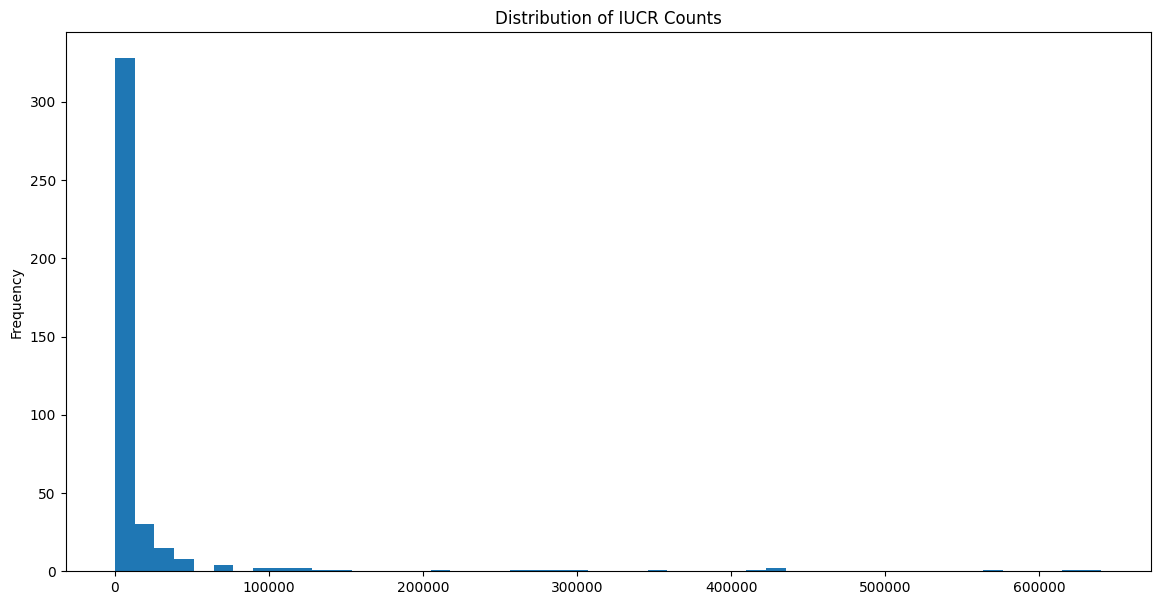

In [12]:
df['Count'].plot(kind='hist', bins=50, figsize=(14, 7), title="Distribution of IUCR Counts")

As you can see, of our 405 IUCR codes, almost all of them are low volume (sitting at 1). As you start to travel along the X axis, activity significantly drops off. Going further, you see activity at 100k, 200k, 300k and so on to the extreme of 600k. A small portion of IUCR codes account for about **90%** of the overall crime in chicago.

This point can be further illustrated in the plot below.

<Axes: title={'center': 'Cumulative Percentage of Counts by Top 50 IUCRs'}>

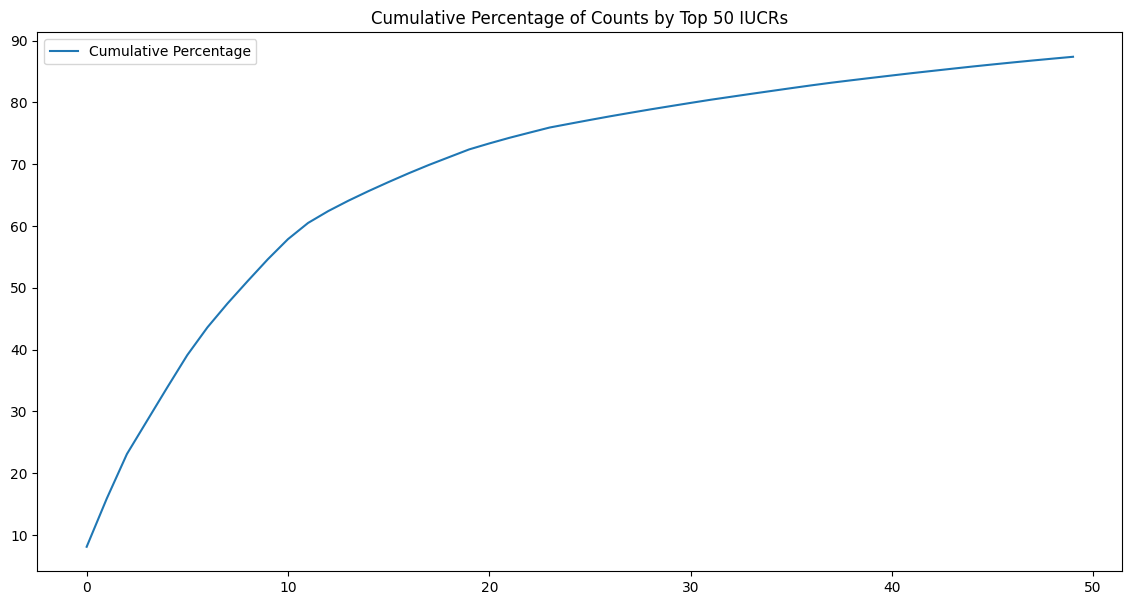

In [5]:
df['Cumulative Percentage'] = df['Count'].cumsum() / df['Count'].sum() * 100
df.head(50).plot(y='Cumulative Percentage', use_index=False, figsize=(14, 7), title="Cumulative Percentage of Counts by Top 50 IUCRs")


But let's not beat a dead horse here. What else can we glean from these 7,915,834 crime statistics?

Well each of these IUCR codes is categorized by a primary type. If we take a look at the top 15 of these types:

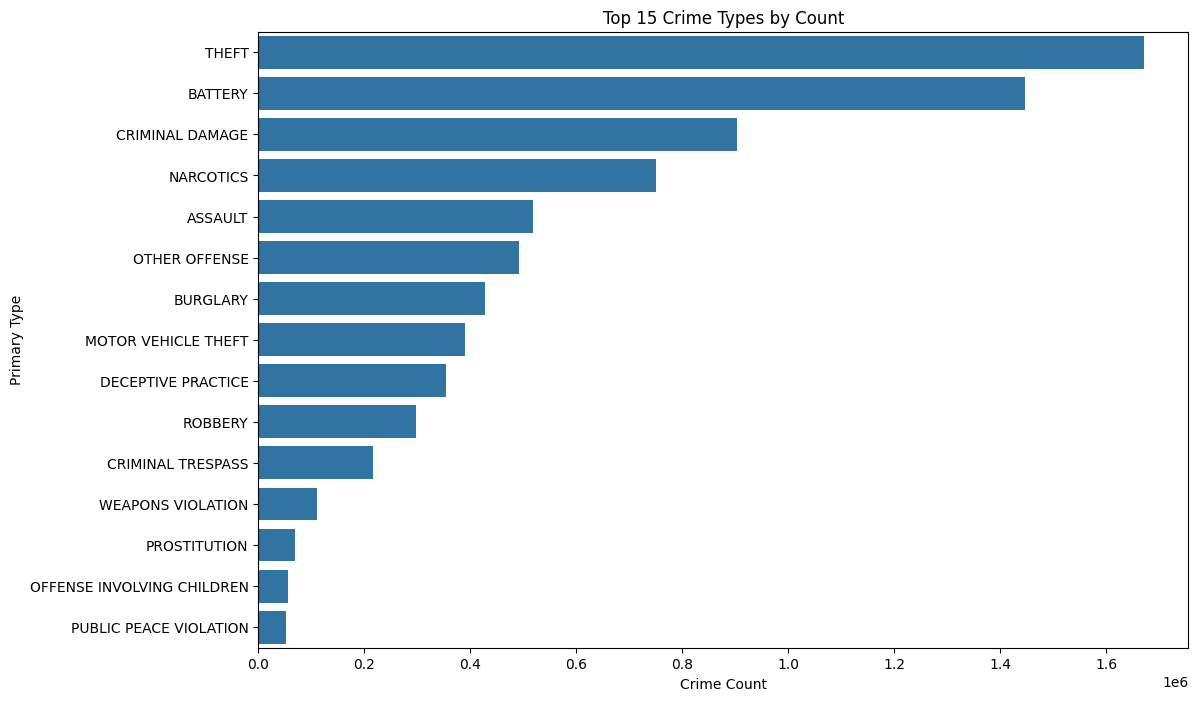

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
new_query = '''
select `Primary Type`, count(*) as `Crime Count`
from crime_data
group by `Primary Type`
order by `Crime Count` desc;'''
crimes_by_type = pd.read_sql(new_query, engine)
top_15 = crimes_by_type.sort_values(by="Crime Count", ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(data=top_15, y="Primary Type", x="Crime Count")
plt.title("Top 15 Crime Types by Count")
plt.show()

We can see see that the most committed crime type is theft